<H5><B><U>ANOVA/KRUSKAL-WALLIS TEST</U></B></H5>
<HR></HR>

In [1]:
d=read.csv('/content/KW_r.csv',nrows = 1601)
head(d)
attach(d)

,PM.2.5,WD,Direction
,<dbl>,<dbl>,<chr>
1,361.54,137.45,SE
2,405.96,187.16,S
3,360.71,110.91,ESE
4,271.92,136.27,SE
5,325.86,293.24,WNW
6,191.99,174.35,S


In [4]:
tail(d)

,PM.2.5,WD,Direction
,<dbl>,<dbl>,<chr>
1595,23.10,172.82,S
1596,30.86,182.82,S
1597,99.86,183.33,S
1598,39.13,125.09,SE
1599,40.21,197.87,SSW
1600,34.70,250.42,WSW


In [5]:
str(d)

'data.frame':	1600 obs. of  3 variables:
 $ PM.2.5   : num  362 406 361 272 326 ...
 $ WD       : num  137 187 111 136 293 ...
 $ Direction: chr  "SE" "S" "ESE" "SE" ...


In [7]:
shapiro.test(d$PM.2.5) #Here p-value<0.05_data is not normal


	Shapiro-Wilk normality test

data:  d$PM.2.5
W = 0.83515, p-value < 2.2e-16


In [8]:
shapiro.test(log(d$PM.2.5))#Here p-value<0.05_data is not normal


	Shapiro-Wilk normality test

data:  log(d$PM.2.5)
W = 0.99608, p-value = 0.0003875


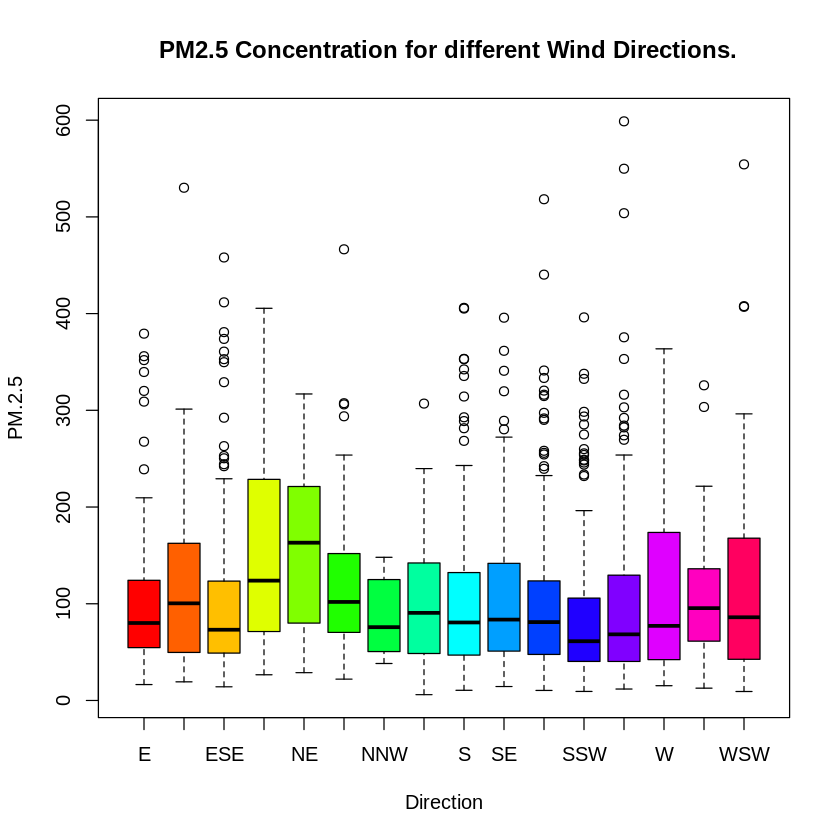

In [9]:
boxplot(PM.2.5~Direction, main = " PM2.5 Concentration for different Wind Directions.", col = rainbow(16))

In [ ]:
#Since assumption of normality for ANOVA is not fulfilled, we perform Kruskal-Wallis test

In [2]:
data=data.frame(d$`PM.2.5`,d$Direction)
head(data)

,d.PM.2.5,d.Direction
,<dbl>,<chr>
1,361.54,SE
2,405.96,S
3,360.71,ESE
4,271.92,SE
5,325.86,WNW
6,191.99,S


In [3]:
tail(data)

,d.PM.2.5,d.Direction
,<dbl>,<chr>
1595,23.10,S
1596,30.86,S
1597,99.86,S
1598,39.13,SE
1599,40.21,SSW
1600,34.70,WSW


In [40]:
model=kruskal.test(data$`d.PM.2.5`~data$d.Direction)
model


	Kruskal-Wallis rank sum test

data:  data$d.PM.2.5 by data$d.Direction
Kruskal-Wallis chi-squared = 48.461, df = 15, p-value = 2.143e-05


In [ ]:
# Since p-value <0.05, we conclude that there is a significant differernce between atleast one pair of wind directions

In [ ]:
# Now, we proceed to the post-hoc analysis

In [5]:
pairwise.wilcox.test(d$PM.2.5,d$Direction,p.adj="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  d$PM.2.5 and d$Direction 

    E      ENE    ESE    N      NE      NNE    NNW    NW     S      SE    
ENE 1.0000 -      -      -      -       -      -      -      -      -     
ESE 1.0000 1.0000 -      -      -       -      -      -      -      -     
N   1.0000 1.0000 1.0000 -      -       -      -      -      -      -     
NE  0.0040 1.0000 0.0057 1.0000 -       -      -      -      -      -     
NNE 1.0000 1.0000 1.0000 1.0000 1.0000  -      -      -      -      -     
NNW 1.0000 1.0000 1.0000 1.0000 1.0000  1.0000 -      -      -      -     
NW  1.0000 1.0000 1.0000 1.0000 0.1286  1.0000 1.0000 -      -      -     
S   1.0000 1.0000 1.0000 1.0000 0.0109  1.0000 1.0000 1.0000 -      -     
SE  1.0000 1.0000 1.0000 1.0000 0.0486  1.0000 1.0000 1.0000 1.0000 -     
SSE 1.0000 1.0000 1.0000 1.0000 0.0105  1.0000 1.0000 1.0000 1.0000 1.0000
SSW 0.4089 0.2328 1.0000 0.3028 3.7e-05 0.0100 1.0000 1.0000

In [ ]:
# An alternative post-hoc test is Dunn Test

In [17]:
install.packages("FSA",repos = "http://cran.rstudio.com/")
library(FSA)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘dunn.test’, ‘lmtest’, ‘plotrix’


## FSA v0.9.4. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.



In [29]:
dunnTest(d$`PM.2.5`~d$Direction,data=d,method = "bonferroni")

Warning message:
“d$Direction was coerced to a factor.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




    Comparison            Z      P.unadj        P.adj
1      E - ENE -1.275847420 2.020095e-01 1.000000e+00
2      E - ESE  0.324116069 7.458502e-01 1.000000e+00
3    ENE - ESE  1.563100017 1.180291e-01 1.000000e+00
4        E - N -2.034773592 4.187366e-02 1.000000e+00
5      ENE - N -1.317024520 1.878304e-01 1.000000e+00
6      ESE - N -2.181724461 2.912987e-02 1.000000e+00
7       E - NE -3.760368688 1.696631e-04 2.035957e-02
8     ENE - NE -2.487687178 1.285768e-02 1.000000e+00
9     ESE - NE -4.012384275 6.010855e-05 7.213026e-03
10      N - NE -0.338736970 7.348079e-01 1.000000e+00
11     E - NNE -2.086763454 3.690952e-02 1.000000e+00
12   ENE - NNE -0.905450480 3.652268e-01 1.000000e+00
13   ESE - NNE -2.336580388 1.946101e-02 1.000000e+00
14     N - NNE  0.697606227 4.854235e-01 1.000000e+00
15    NE - NNE  1.471026241 1.412840e-01 1.000000e+00
16     E - NNW  0.199571434 8.418158e-01 1.000000e+00
17   ENE - NNW  0.693421999 4.880448e-01 1.000000e+00
18   ESE - NNW  0.093072101 